# Visualization of properties of the Fourier transform

This demo is supposed to visualize some [basic properties](https://en.wikipedia.org/wiki/Fourier_transform#Basic_properties) of the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform). 

This demo is written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) for a basic course on signals and systems hold at the [university of applied sciences, Berlin](https://www.htw-berlin.de/).

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets

plt.style.use('noelle.mplstyle')

## Define helper functions

In [2]:
def plot_signal(t, f, sig):
    
    sig[np.abs(sig) < 1e-10] = 0
    
    # calc spectrum of data signal
    Sig = np.fft.fft(np.fft.fftshift(sig))
    Sig[np.abs(Sig) < 1e-10] = 0
    # normalize
    SigNorm = Sig / np.max(np.abs(Sig))
    # prepare phase for plotting
    angle = np.unwrap(np.fft.fftshift(np.angle(SigNorm)))
    angle -= angle[f == 0]    
    
    # prepare plots
    n_row = 2
    n_col = 3       
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig = plt.figure(figsize=fig_size)
    
    # plot time signal    
    ax = fig.add_subplot(2, 3, 1)
    ax.plot(t, np.real(sig), 'C2', t, np.imag(sig), 'C1')
    ax.set_xlim(-5, 5)
    ax.set_xlabel('time / s')
    ax.set_ylabel('amplitude / a.u.') 
    ax.legend(['Re(x(t))', 'Im(x(t))'])
        
    ax = fig.add_subplot(2, 3, 2)
    ax.plot(t, np.abs(sig))
    ax.set_xlabel('time / s')
    ax.set_ylabel('abs(x(t)) / a.u.')
    ax.set_xlim(-5, 5)
    
    ax = fig.add_subplot(2, 3, 3)
    ax.plot(t, np.angle(sig) / np.pi, 'C3')
    ax.set_xlabel('time / s')
    ax.set_ylabel('arg(x(t)) / $\pi$ / rad')
    ax.set_xlim(-5, 5)
    maxAngle = np.max(np.angle(sig)[np.abs(f) <= 5] / np.pi)
    minAngle = np.min(np.angle(sig)[np.abs(f) <= 5] / np.pi)
    ax.set_ylim(minAngle-1, maxAngle+1)
    
    # plot spectrum
    ax = fig.add_subplot(2, 3, 4)
    ax.plot(f, np.fft.fftshift(np.real(SigNorm)) ,'C2', f, np.fft.fftshift(np.imag(SigNorm)) ,'C1')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('amplitude / a.u.')
    ax.legend(['Re(X(j$\omega$))', 'Im(X(j$\omega$))'])
    ax.set_xlim(-5, 5)    
   
    ax = fig.add_subplot(2, 3, 5)
    ax.plot(f, np.fft.fftshift(np.abs(SigNorm)))
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('norm. abs(X(j$\omega$)) / a.u.')
    ax.set_xlim(-5, 5)
    
    ax = fig.add_subplot(2, 3, 6)
    ax.plot(f, angle / np.pi, 'C3')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('arg(X(j$\omega$)) / $\pi$ / rad')
    ax.set_xlim(-5, 5)
    maxAngle = np.max(angle[np.abs(f) <= 5] / np.pi)
    minAngle = np.min(angle[np.abs(f) <= 5] / np.pi)
    ax.set_ylim(minAngle-1, maxAngle+1)
    
    plt.tight_layout()
    plt.show()

In [3]:
def gen_signal(T=1, tau=0.0, omega_0=0.0):
    
    sr = 1000 # sample rate
    dur = 50 # duration of signals in s        

    # time and frequency axis
    t = np.arange(-dur/2, dur/2, 1 / sr)
    f = np.fft.fftshift(np.fft.fftfreq(t.size, 1 / sr))

    # generate rect signal
    sig = np.zeros(t.size)
    sig[np.abs(t - tau) <= T/2]= 1
    # modulation?
    sig = sig * np.exp(1j * omega_0 * t)

    plot_signal(t, f, sig)

## Time scaling property

Assuming the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) (or the [frequency spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) ) of the time signal $x(t)$ being $X(j\omega)$. In this case, the spectrum of the by $a$ stretched or compressed time signal is given by 

$$ \mathcal{F}\{x(at)\} =  \frac{1}{|a|} X\left(\frac{j\omega}{a}\right).$$

This property is visualized below for the case of a rectangular time signal.

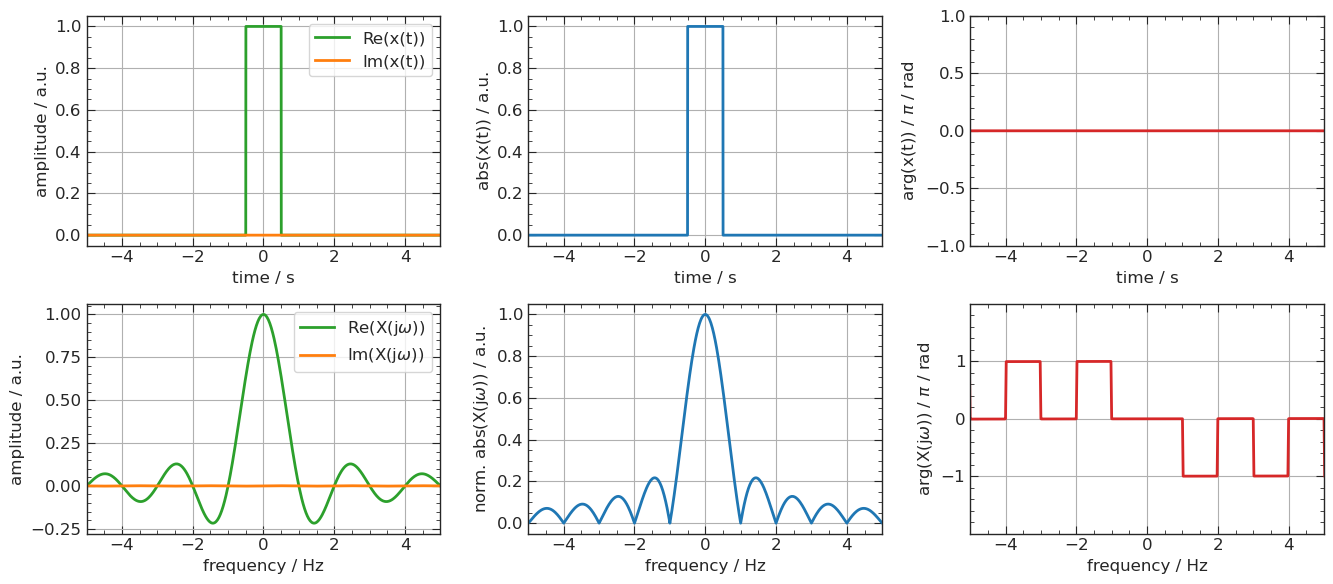

In [4]:
plot = widgets.interactive(gen_signal,
                 T=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1, continuous_update=False),
                 tau=widgets.fixed(0.0),
                 omega_0=widgets.fixed(0.0));
out = plot.children[-1]
out.layout.height = '600px'

display(plot)

## Time shift property

Assuming the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) (or the [frequency spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) ) of the time signal $x(t)$ being $X(j\omega)$. In this case, the spectrum of the by $t_0$ temporally shifted time signal is given by 

$$ \mathcal{F}\{x(t-t_0)\} =  X(j\omega)\cdot \text{e}^{-j\omega t_0}.$$

This property is visualized below for the case of a rectangular time signal.

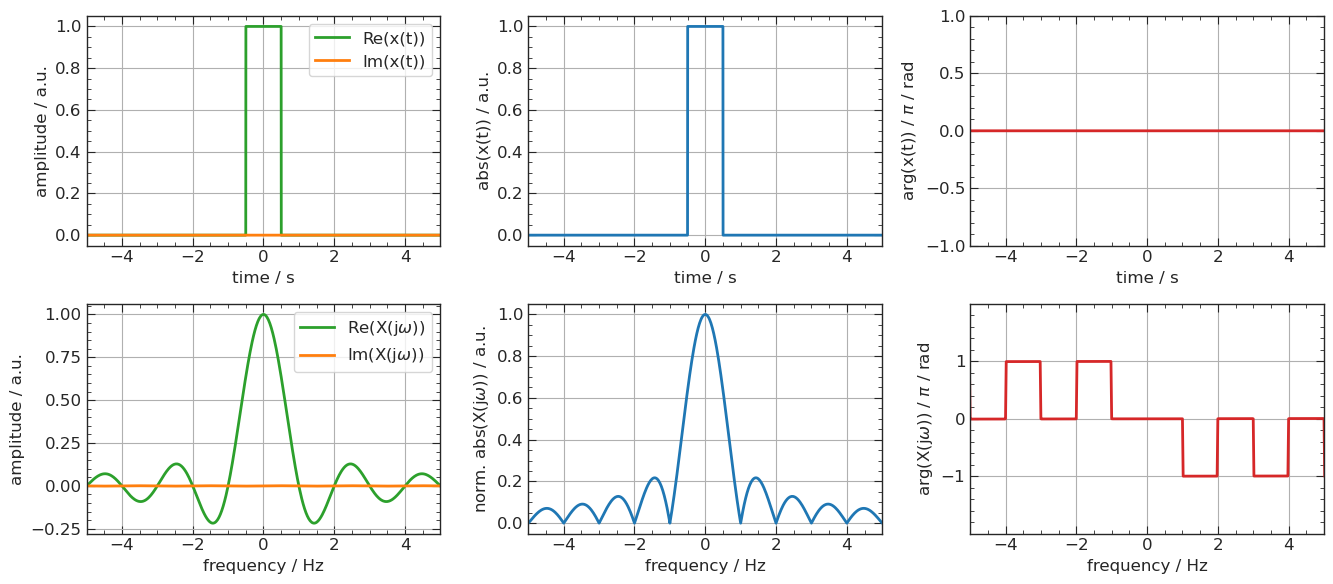

In [5]:
plot = widgets.interactive(gen_signal,
                 tau=widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=0.0, continuous_update=False),
                 T=widgets.fixed(1.0),
                 omega_0=widgets.fixed(0.0));
out = plot.children[-1]
out.layout.height = '600px'

display(plot)

## Frequency shift (modulation) property

Assuming the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) (or the [frequency spectrum](https://en.wikipedia.org/wiki/Spectral_density#Explanation) ) of the time signal $x(t)$ being $X(j\omega)$. In this case, the correspondence between the by $\omega_0$ shifted spectrum and the corresponding time signal is given by 

$$ \mathcal{F}\{x(t)\cdot\text{e}^{j\omega_0t}\} =  X(j(\omega-\omega_0)).$$

This property is visualized below for the case of a rectangular time signal.

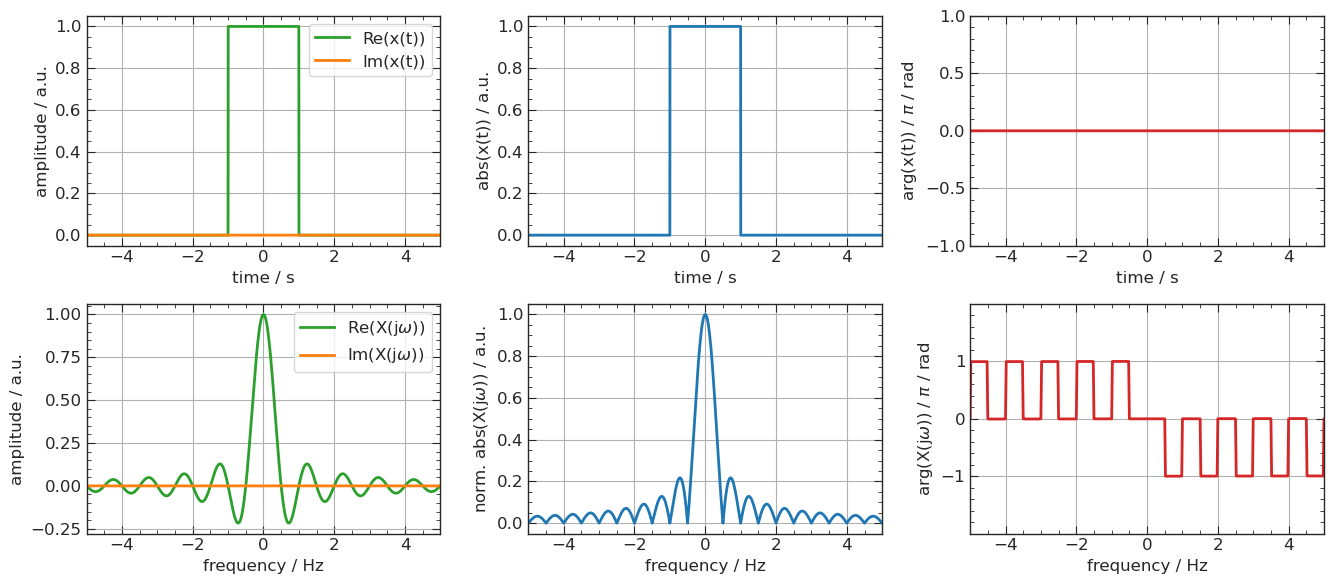

In [6]:
plot = widgets.interactive(gen_signal,
                 omega_0=widgets.FloatSlider(min=-20.0, max=20.0, step=2, value=0.0, continuous_update=False, description='$\omega_0$'),
                 tau=widgets.fixed(0.0),
                 T=widgets.fixed(2.0));
out = plot.children[-1]
out.layout.height = '600px'

display(plot)